# Training XResNet on Imagenette

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from importlib.util import find_spec
if find_spec("model") is None:
    import sys
    sys.path.append('..')

In [3]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [4]:
from model.backbone.xresnet import xresnet50
from data_loader.data_loaders import load_imagenette160_dls

In [5]:
dls = load_imagenette160_dls(bs=32)

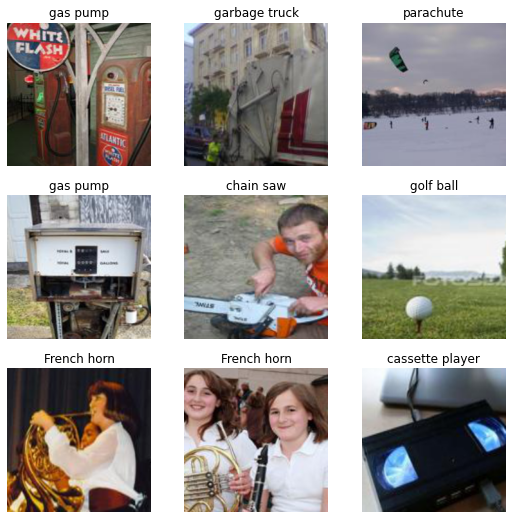

In [6]:
dls.show_batch()

## Using FastAI Init (init_cnn).

In [7]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=0.5248074531555176)

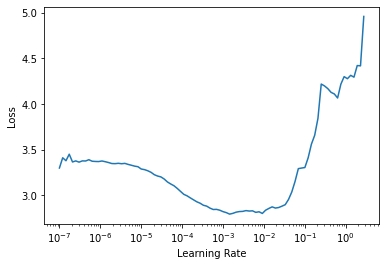

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.080554,2.762206,0.266752,01:02
1,1.658066,2.265312,0.466242,01:02
2,1.312482,1.202436,0.613248,01:02
3,1.047727,1.050240,0.660892,01:02
4,0.864211,0.886420,0.718981,01:02


## PyTorch BatchNorm Init + Detectron C2MSR Init + 1Hour Linear Init

In [10]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.0964781722577754e-06)

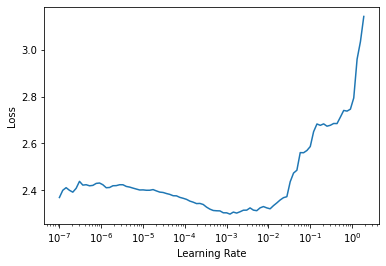

In [11]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.897969,2.158692,0.357962,01:00
1,1.521136,1.482628,0.520510,01:01
2,1.227089,1.295064,0.578853,01:01
3,1.001495,0.956772,0.689682,01:01
4,0.820332,0.876819,0.716178,01:01


## Train XResNet50 with Label Smoothing

In [15]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=0.25118863582611084)

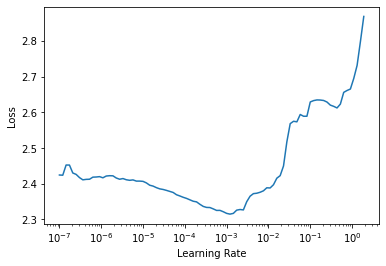

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.995932,2.635135,0.286115,01:00
1,1.685077,1.645459,0.520510,01:00
2,1.468901,1.441637,0.611210,01:01
3,1.291183,1.278660,0.683057,01:01
4,1.175559,1.194724,0.712102,01:01


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=2.2908675418875646e-06)

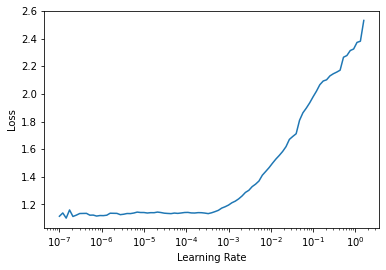

In [18]:
learn.lr_find()

# Train XResNet50 + Mixup

In [19]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=MixUp())

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=0.12022644281387329)

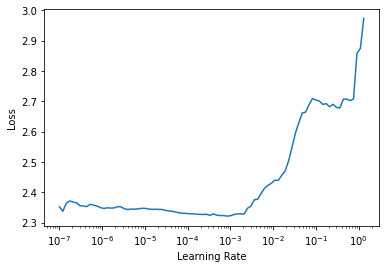

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.203264,2.236632,0.259363,01:00
1,2.012853,2.008118,0.325605,01:00
2,1.903627,1.784127,0.441783,01:01
3,1.821911,1.684073,0.497580,01:01
4,1.791666,1.635171,0.518217,01:01


## Overfit Data Using XResNet50++ (bs = 32)

In [7]:
from model.backbone.xresnet import xresnet101

In [8]:
model = xresnet101(num_classes=10, train_mode=True)

In [9]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, wd=0)

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=0.2089296132326126)

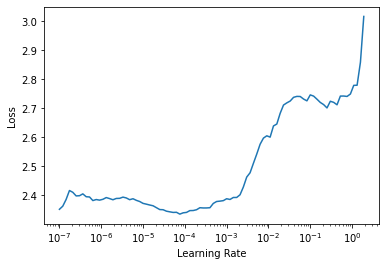

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(4, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.114120,2.199394,0.229809,01:37
1,1.905813,1.969013,0.341401,01:38
2,1.761632,1.758412,0.460127,01:39
3,1.730998,1.719526,0.470064,01:38


In [12]:
model = xresnet101(num_classes=10, train_mode=True)

In [13]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=0.0831763744354248)

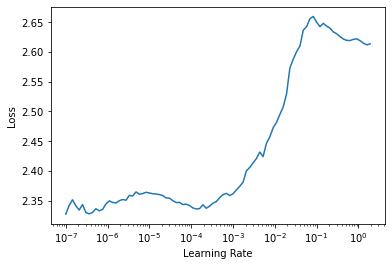

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(5, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.223313,2.253548,0.170191,01:39
1,2.181374,26.455107,0.138344,01:41
2,2.099987,3.560304,0.213248,01:39
3,1.918421,1.867719,0.384968,01:39
4,1.804745,1.784396,0.429045,01:39


# Seeing What we Got - Using `init_c2msr_fill`

In [7]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=0.3630780577659607)

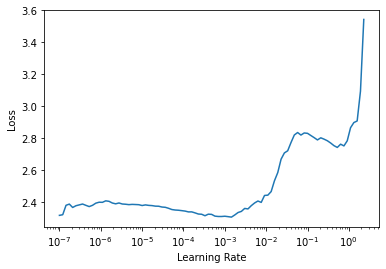

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.980196,1.946224,0.337580,01:03
1,1.621712,1.585245,0.475414,01:02
2,1.410604,1.360472,0.557452,01:03
3,1.286117,1.270217,0.594650,01:03
4,1.253031,1.236608,0.602038,01:03


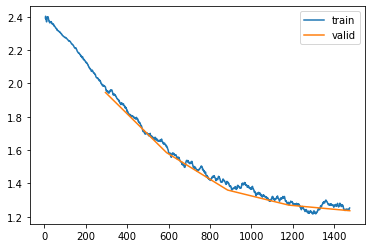

In [10]:
learn.recorder.plot_loss()

In [12]:
# See https://forums.fast.ai/t/plotting-metrics-after-learning/69937/3?u=mar
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

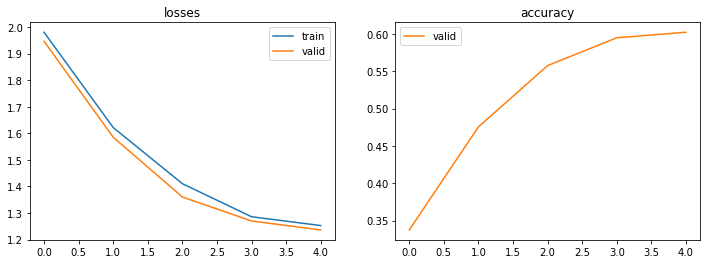

In [13]:
learn.recorder.plot_metrics()

In [14]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.331847,1.275142,0.583949,01:02
1,1.275170,1.477577,0.529682,01:02
2,1.162658,1.123457,0.632866,01:03
3,1.055508,1.093582,0.650701,01:03
4,1.021222,1.037545,0.662420,01:03


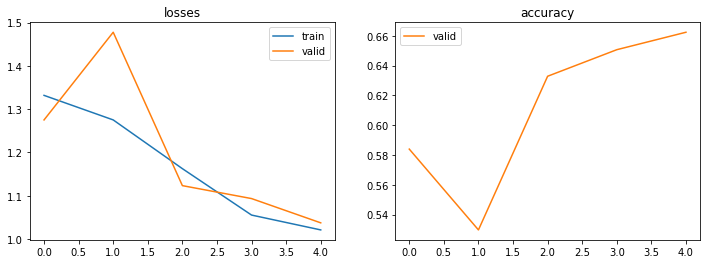

In [15]:
learn.recorder.plot_metrics()

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=3.630780702224001e-05)

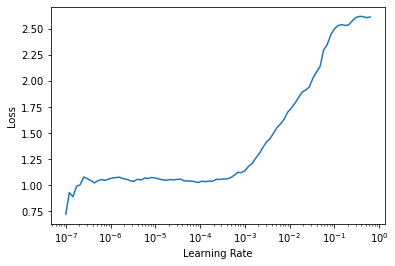

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(5, 3.6e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.080062,1.166766,0.623439,01:02
1,1.059925,1.122383,0.646115,01:02
2,0.979508,1.012616,0.667006,01:02
3,0.951815,0.930069,0.690191,01:03
4,0.877676,0.912824,0.699618,01:03


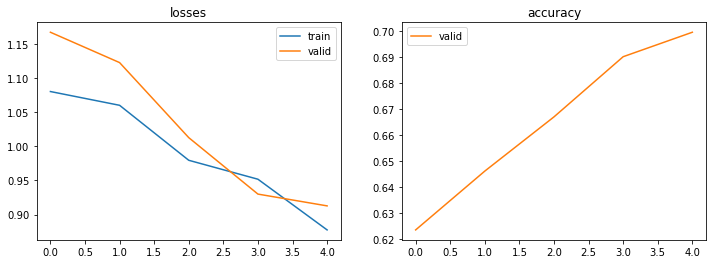

In [18]:
learn.recorder.plot_metrics()

In [19]:
learn.fit_one_cycle(5, 3.6e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.937396,1.088987,0.649172,01:02
1,0.980253,0.986133,0.679490,01:03
2,0.873480,0.929068,0.699618,01:03
3,0.799178,0.876333,0.715414,01:03
4,0.801144,0.852297,0.721783,01:03


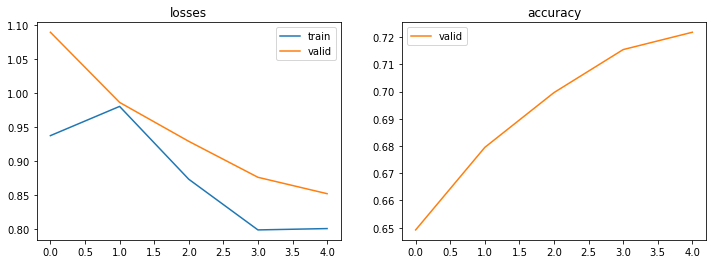

In [20]:
learn.recorder.plot_metrics()

In [21]:
learn.fit_one_cycle(5, 3.6e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.818263,1.025719,0.664713,01:02
1,0.888986,0.983711,0.683057,01:03
2,0.812932,0.882966,0.717452,01:03
3,0.748316,0.830673,0.731720,01:03
4,0.663505,0.812373,0.737070,01:03


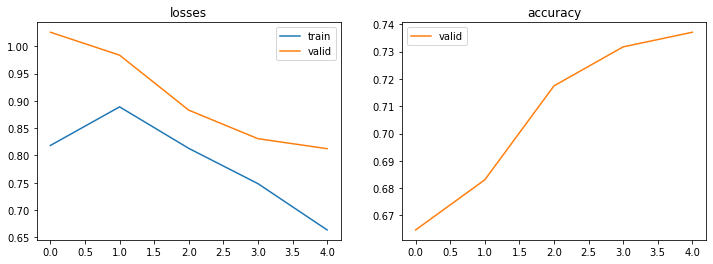

In [22]:
learn.recorder.plot_metrics()

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=3.981071586167673e-06)

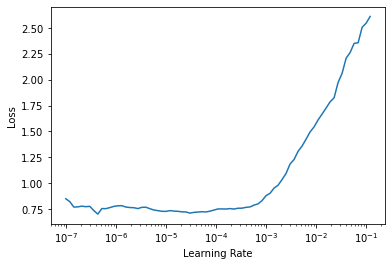

In [23]:
learn.lr_find()

In [24]:
learn.fit_one_cycle(5, 3.9e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.695969,0.812758,0.736561,01:02
1,0.683750,0.816621,0.736051,01:03
2,0.692660,0.805037,0.738854,01:03
3,0.673086,0.810512,0.736306,01:03
4,0.684928,0.803436,0.738089,01:03


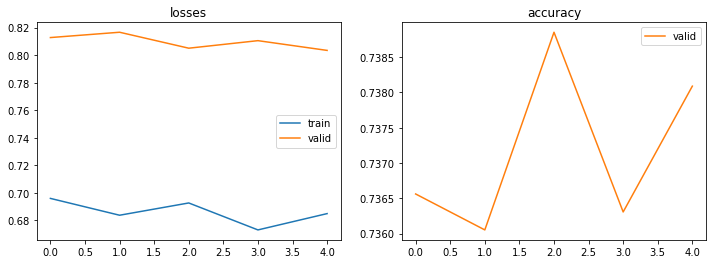

In [25]:
learn.recorder.plot_metrics()

# See What We Get - Using `init_cnn`

In [26]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=6.309573450380412e-07)

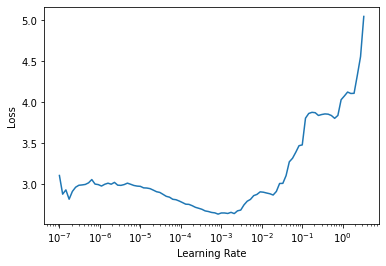

In [27]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.988593,2.188084,0.315669,01:02
1,1.736676,1.878041,0.397962,01:02
2,1.551992,1.570173,0.493503,01:03
3,1.398209,1.425114,0.545732,01:03
4,1.334539,1.366104,0.553631,01:03


## Is my Dataset Normal?

In [29]:
def stats(x): return f"mean of {x.mean()}; std of {x.std()}"

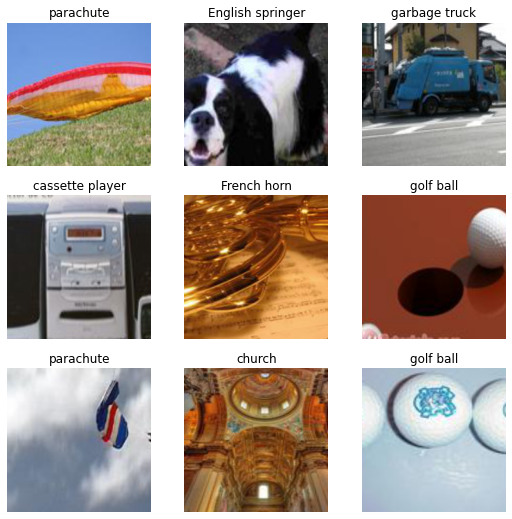

In [32]:
dls.show_batch()

In [33]:
type(dls)

fastai.data.core.DataLoaders

In [36]:
X_batch, y_batch = dls.train.one_batch()
X_batch.shape, y_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [37]:
stats(X_batch)

'mean of -0.2111019641160965; std of 1.2001643180847168'

> Seems pretty standard to me.

## Compare to FastAI's XResNet50

In [42]:
from fastai.vision.models.xresnet import xresnet50

In [49]:
learn = Learner(dls, xresnet50(n_out=10), metrics=accuracy)

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=0.9120108485221863)

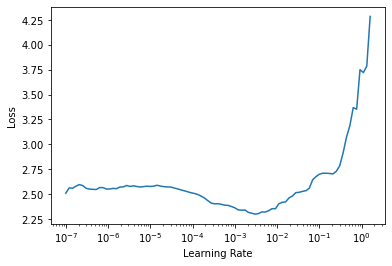

In [50]:
learn.lr_find()

In [51]:
learn.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.036153,2.885014,0.220127,01:02
1,1.780161,2.649784,0.290191,01:02
2,1.476263,1.933813,0.398217,01:02
3,1.289955,1.339249,0.535032,01:02
4,1.156352,1.107229,0.644586,01:03


In [52]:
from model.backbone.xresnet import xresnet50

In [53]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True), metrics=accuracy)

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=0.3019951581954956)

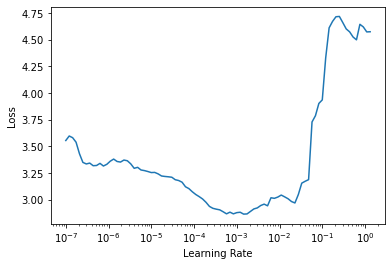

In [54]:
learn.lr_find()

In [55]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.948807,2.369683,0.368153,01:02
1,1.577406,1.755324,0.537834,01:02
2,1.315723,1.304975,0.583694,01:03
3,0.975637,0.979246,0.698344,01:03
4,0.794573,0.863514,0.731465,01:03


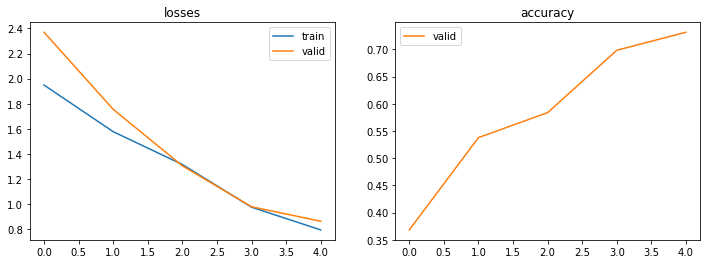

In [56]:
learn.recorder.plot_metrics()

In [59]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.157624,2.247632,0.470573,01:02
1,1.049026,1.159112,0.644076,01:02
2,0.888356,0.834410,0.736051,01:03
3,0.716997,0.666230,0.786752,01:03
4,0.545687,0.612368,0.804841,01:03


In [60]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.818456,1.189054,0.640510,01:02
1,0.840945,0.877470,0.723822,01:03
2,0.736468,0.708288,0.771975,01:03
3,0.559098,0.539287,0.831083,01:03
4,0.431420,0.516924,0.836433,01:03


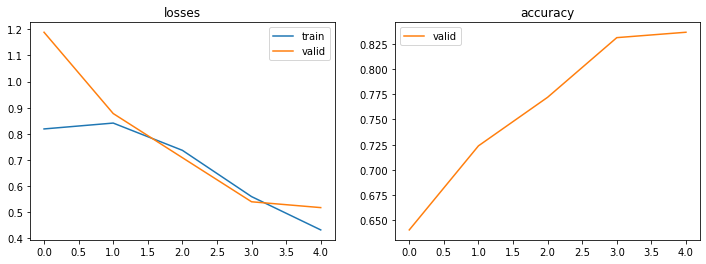

In [62]:
learn.recorder.plot_metrics()

In [63]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.646298,1.064094,0.699873,01:03
1,0.681584,0.665153,0.796433,01:03
2,0.567000,0.638734,0.806624,01:03
3,0.451090,0.486125,0.842803,01:03
4,0.325982,0.463587,0.856306,01:03


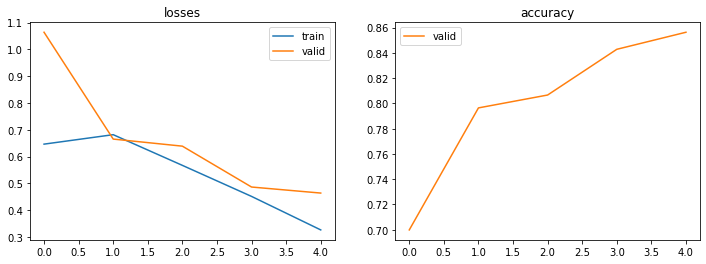

In [64]:
learn.recorder.plot_metrics()

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=6.309573450380412e-07)

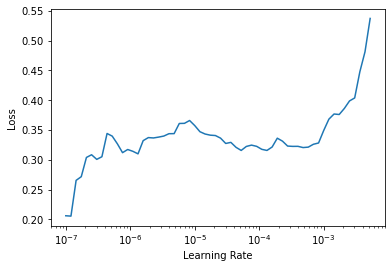

In [65]:
learn.lr_find()

In [67]:
learn.fit_one_cycle(5, 5e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.310557,0.459436,0.856815,01:02
1,0.316275,0.452436,0.859108,01:02
2,0.295700,0.465064,0.855287,01:03
3,0.300697,0.458513,0.858599,01:03
4,0.335829,0.457752,0.858089,01:03


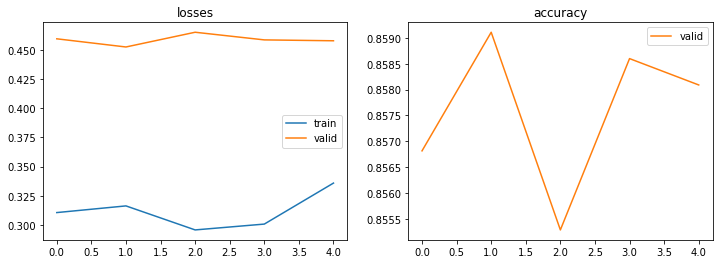

In [68]:
learn.recorder.plot_metrics()

In [69]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.504968,1.166935,0.699363,01:02
1,0.620157,0.904741,0.735287,01:03
2,0.498141,0.543453,0.828535,01:03
3,0.363004,0.467416,0.860127,01:03
4,0.260429,0.434196,0.866242,01:03


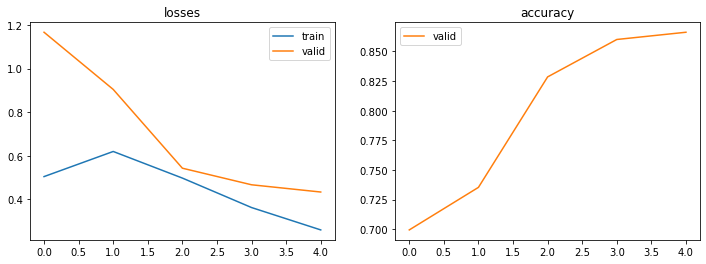

In [70]:
learn.recorder.plot_metrics()

In [71]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.449610,0.649525,0.797452,01:02
1,0.498839,0.614951,0.819108,01:03
2,0.411988,0.523618,0.830573,01:03
3,0.288717,0.410271,0.870828,01:03
4,0.208933,0.389542,0.882803,01:03


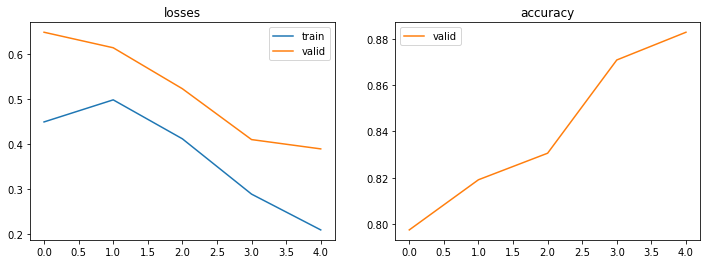

In [72]:
learn.recorder.plot_metrics()

In [73]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.387798,0.666671,0.805350,01:03
1,0.423183,0.652678,0.806115,01:03
2,0.359507,0.492756,0.846879,01:03
3,0.238374,0.437323,0.873631,01:03
4,0.163640,0.400907,0.881783,01:03


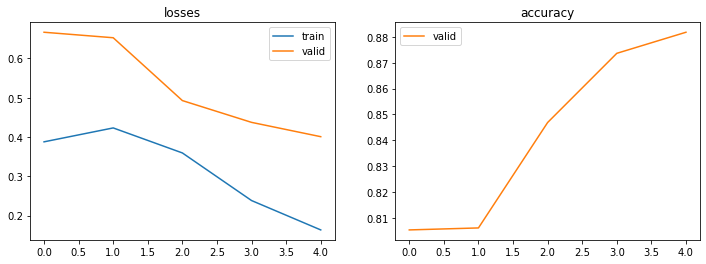

In [74]:
learn.recorder.plot_metrics()

# Train XResNet50 with Dropout - Using `init_cnn`

In [100]:
learn = Learner(dls, xresnet50(num_classes=10, train_mode=True, use_dropout=True), metrics=accuracy)

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=0.6309573650360107)

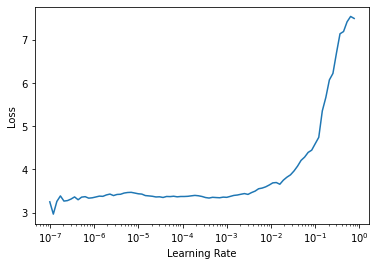

In [102]:
learn.lr_find()

In [99]:
learn.fit_one_cycle(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.216243,3.062325,0.274904,01:03
1,1.822357,4.472281,0.381401,01:03
2,1.443008,1.477122,0.542166,01:04
3,1.192432,1.387975,0.623949,01:04
4,1.046990,1.072718,0.663694,01:04


In [103]:
learn.fit_one_cycle(10, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.719323,3.301759,0.215032,01:03
1,2.164069,16.445982,0.251465,01:03
2,1.853557,3.907595,0.383185,01:03
3,1.575996,5.140255,0.438471,01:04
4,1.409118,1.711032,0.572484,01:04
5,1.192484,1.277028,0.598726,01:04
6,1.089815,1.117680,0.672611,01:04
7,0.941109,0.954803,0.703185,01:04
8,0.837986,1.269673,0.730701,01:04
9,0.799556,1.149732,0.735032,01:04


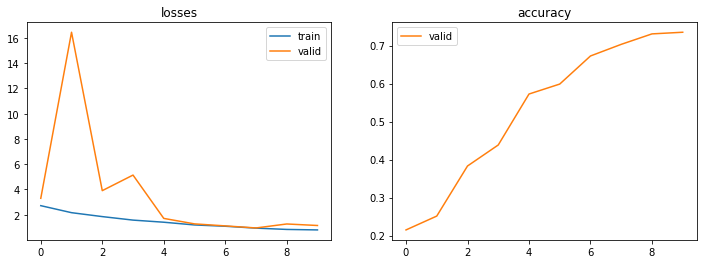

In [104]:
learn.recorder.plot_metrics()

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=9.12010818865383e-07)

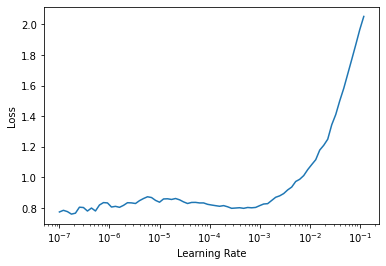

In [105]:
learn.lr_find()

In [106]:
learn.fit_one_cycle(10, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.900909,1.012531,0.695032,01:03
1,1.035335,1.241790,0.607134,01:03
2,1.047290,1.044390,0.662675,01:03
3,1.014218,0.919253,0.710573,01:04
4,0.839939,1.175546,0.652739,01:04
5,0.760339,0.862758,0.727643,01:04
6,0.704880,0.727734,0.773503,01:04
7,0.625399,0.636951,0.804841,01:04
8,0.532553,0.606247,0.808153,01:04
9,0.489637,0.594791,0.815541,01:04


SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=1.3182567499825382e-06)

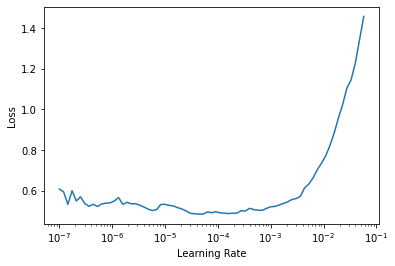

In [107]:
learn.lr_find()

In [109]:
learn.fit_one_cycle(10, 5e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.527148,0.597779,0.809936,01:03
1,0.499505,0.605627,0.811210,01:03
2,0.460820,0.589448,0.818344,01:03
3,0.470274,0.594517,0.816051,01:04
4,0.483803,0.612908,0.819873,01:04
5,0.462668,0.586470,0.819363,01:04
6,0.478378,0.598548,0.813758,01:04
7,0.490899,0.589660,0.820127,01:04
8,0.462372,0.594301,0.820127,01:04
9,0.497848,0.605455,0.814268,01:04


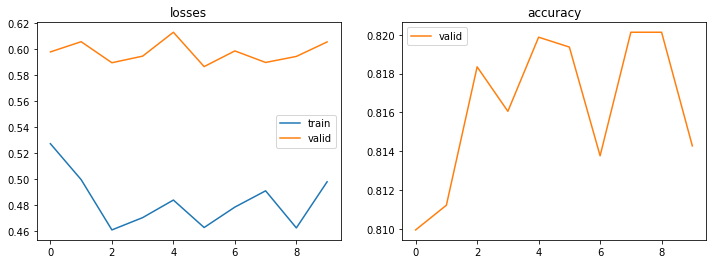

In [110]:
learn.recorder.plot_metrics()

In [ ]:
learn.fit_one_cycle(15, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
